In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [51]:
with open('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'Age': np.float64})

In [60]:
cols = {}
for col in df.columns:
    cols[col] = col.title()
df = df.rename(columns=cols)

In [61]:
df['embarked'] = df.Embarked.fillna('S')
df['Age'] = df.Age.fillna(df.Age.median())

In [62]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)
# child variable
df['Child'] = (df.Age < 16).astype(int)
surv = df[df.Survived == 1]

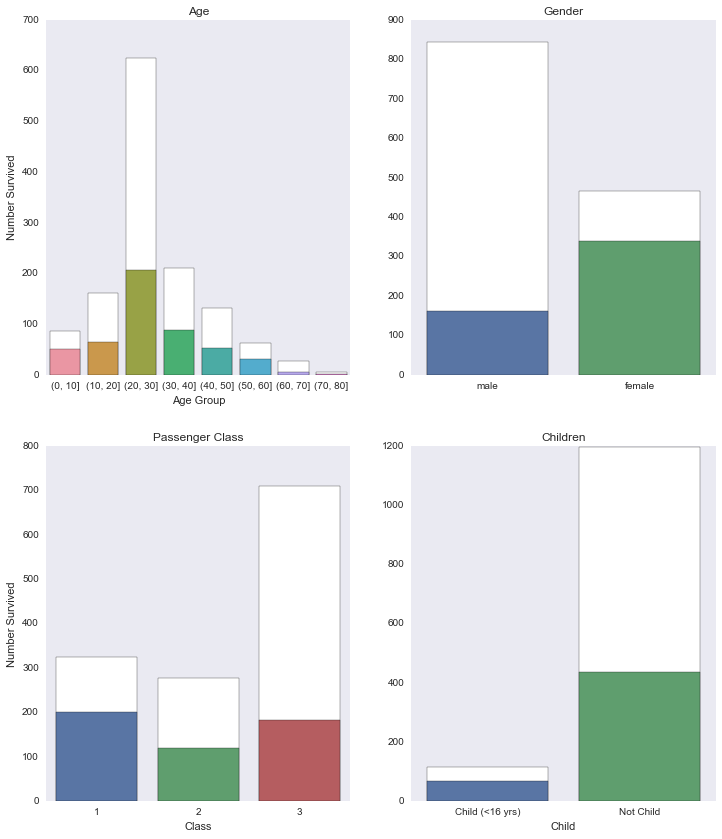

In [63]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))

sns.set_style('dark')
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

sns.countplot(x='age_binned', color='white', ax=ax1, data=df, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


sns.set_style('dark')
sns.countplot(x='Sex', color='white', ax=ax2, data=df, order=['male','female'])
sns.countplot(x='Sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

sns.countplot(x='Pclass', color='white', ax=ax3, data=df,  order=[1, 2, 3])
sns.countplot(x='Pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')


sns.countplot(x='Child', color='white', ax=ax4, data=df, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 17 columns):
Pclass        1309 non-null float64
Survived      1309 non-null float64
Name          1309 non-null object
Sex           1309 non-null object
Age           1310 non-null float64
Sibsp         1309 non-null float64
Parch         1309 non-null float64
Ticket        1309 non-null object
Fare          1308 non-null float64
Cabin         295 non-null object
Embarked      1307 non-null object
Boat          486 non-null object
Body          121 non-null float64
Home.Dest     745 non-null object
embarked      1310 non-null object
age_binned    1310 non-null category
Child         1310 non-null int32
dtypes: category(1), float64(7), int32(1), object(8)
memory usage: 160.1+ KB


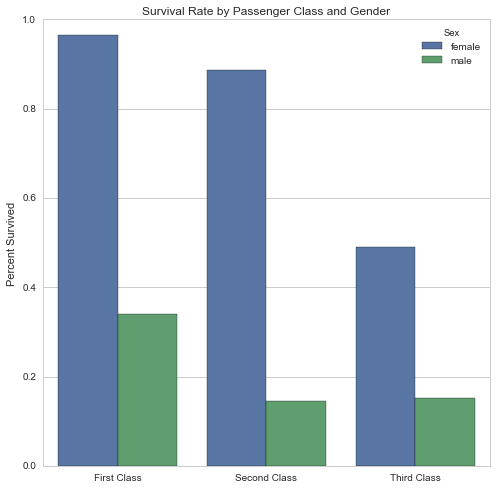

In [80]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=axis, ci=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')